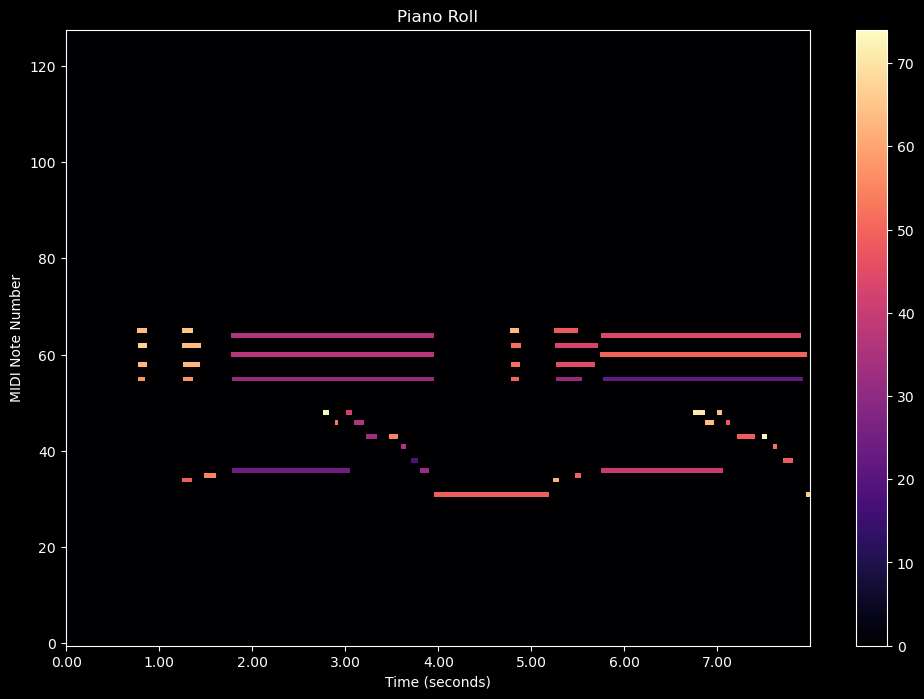

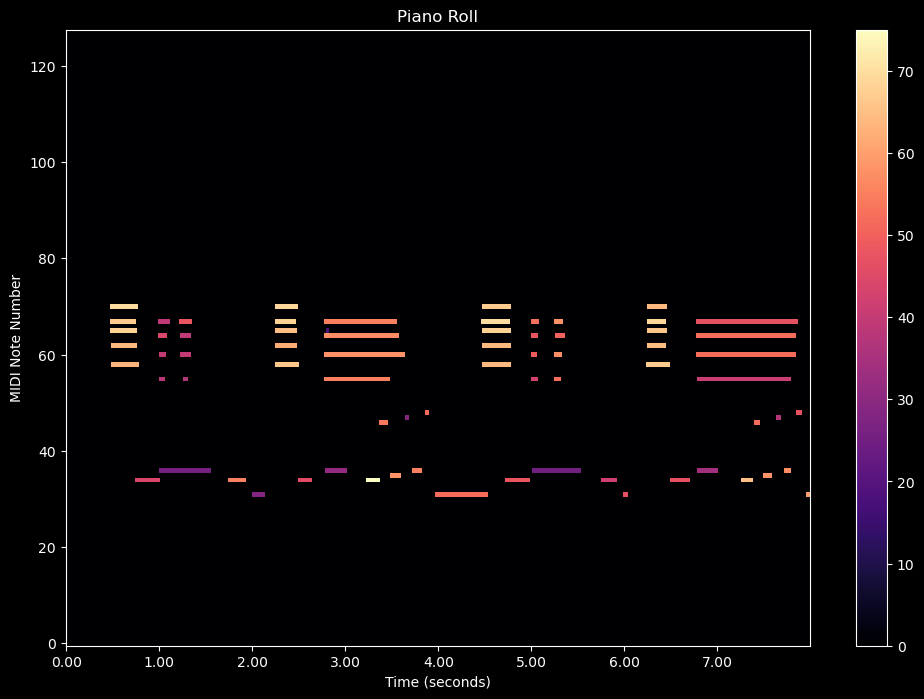

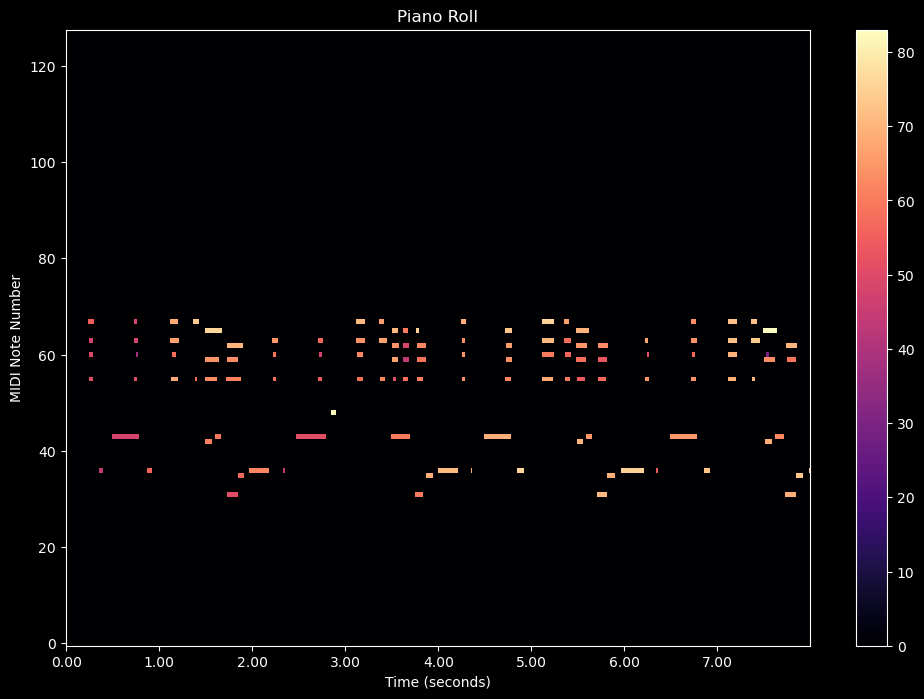

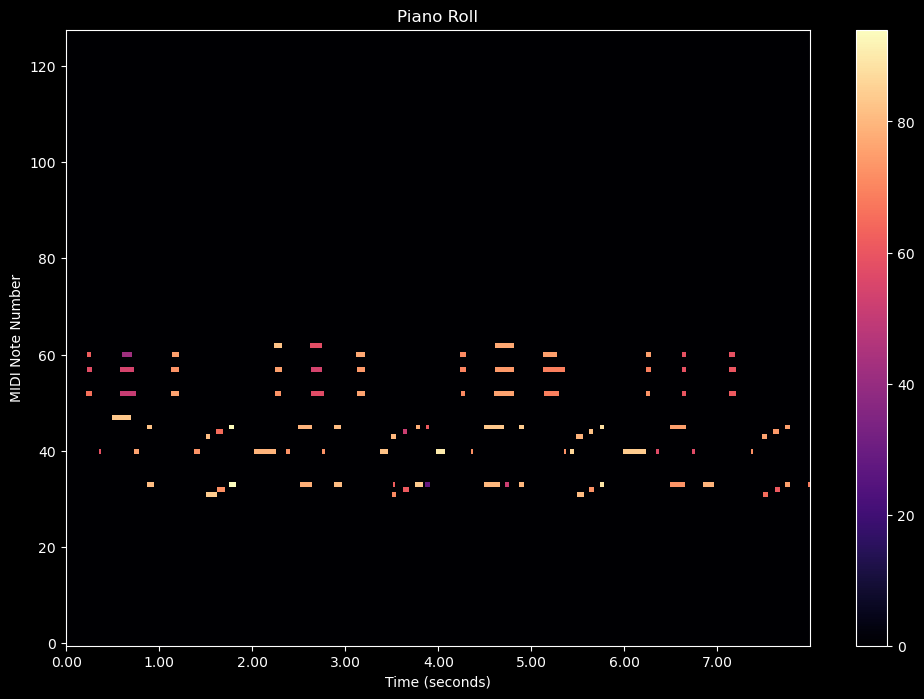

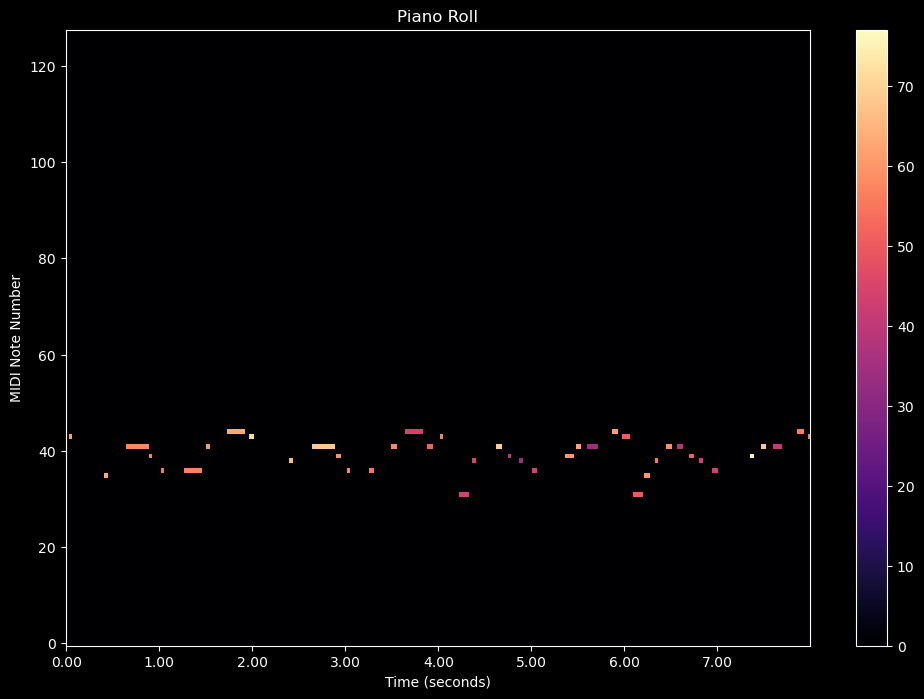

In [1]:
import os
from pathlib import Path
import pretty_midi
import numpy as np
import midi_utils as mu

# filesystem setup
src_folder = "all-time-micro"
input_path = os.path.join("data", "inputs", src_folder)
output_path = os.path.join("data", "outputs", "piano-rolls", src_folder)

if not os.path.exists(output_path):
  os.mkdir(output_path)

# data setup
fs = 100

for file in os.listdir(input_path):
  if file.endswith('.mid') or file.endswith('.midi'):
    filename = Path(file).stem
    file_path = os.path.join(input_path, file)
    midi = pretty_midi.PrettyMIDI(file_path)
    roll = midi.get_piano_roll(fs=fs)
    mu.draw_piano_roll(roll, fs, title=f"Piano Roll fs={fs}")
    np.save(os.path.join(output_path, f"{filename}_pr-{fs}.npy"), roll, allow_pickle=True)

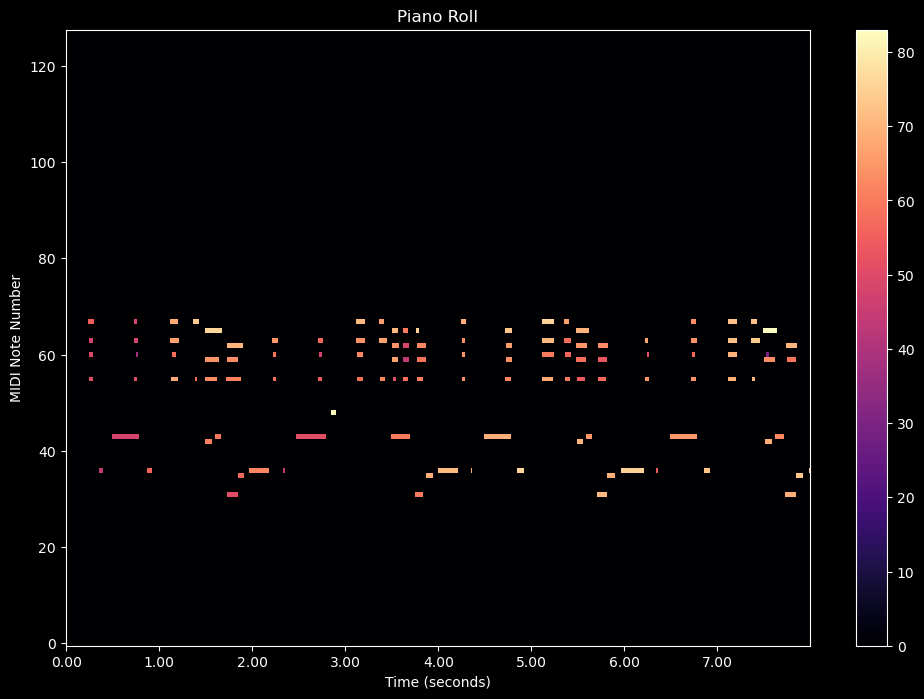

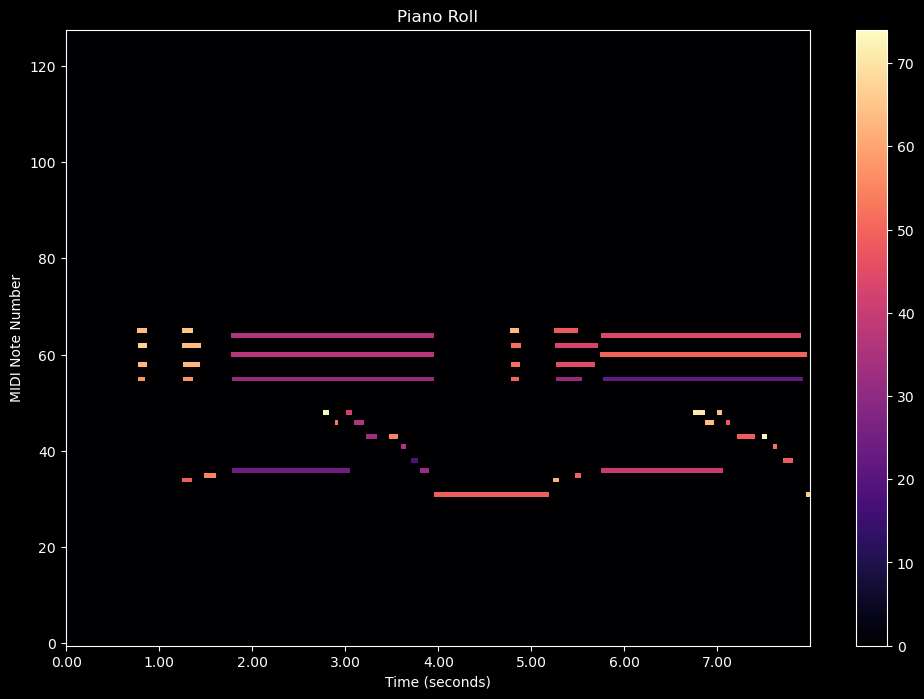

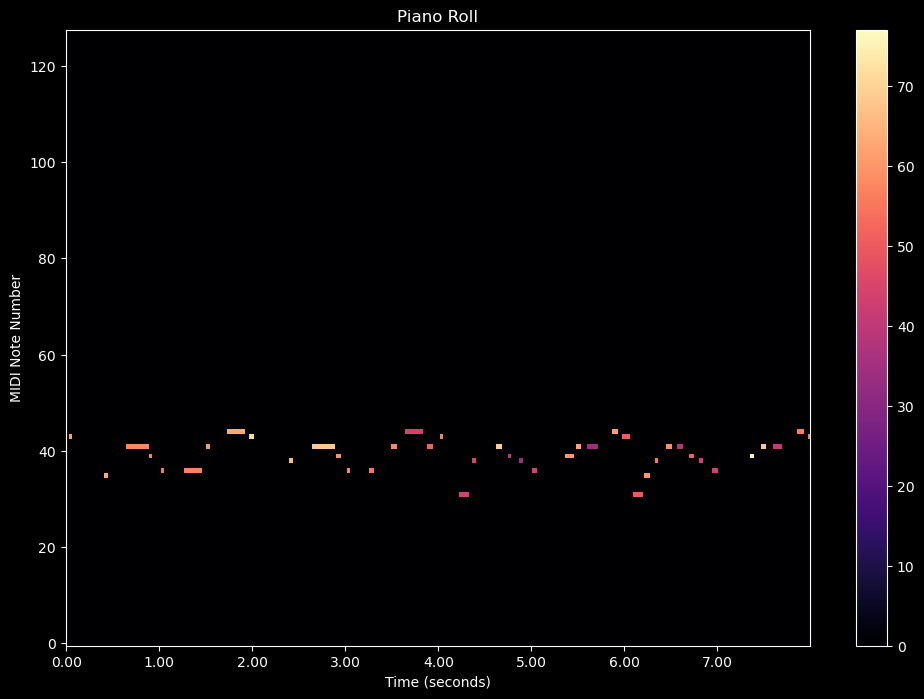

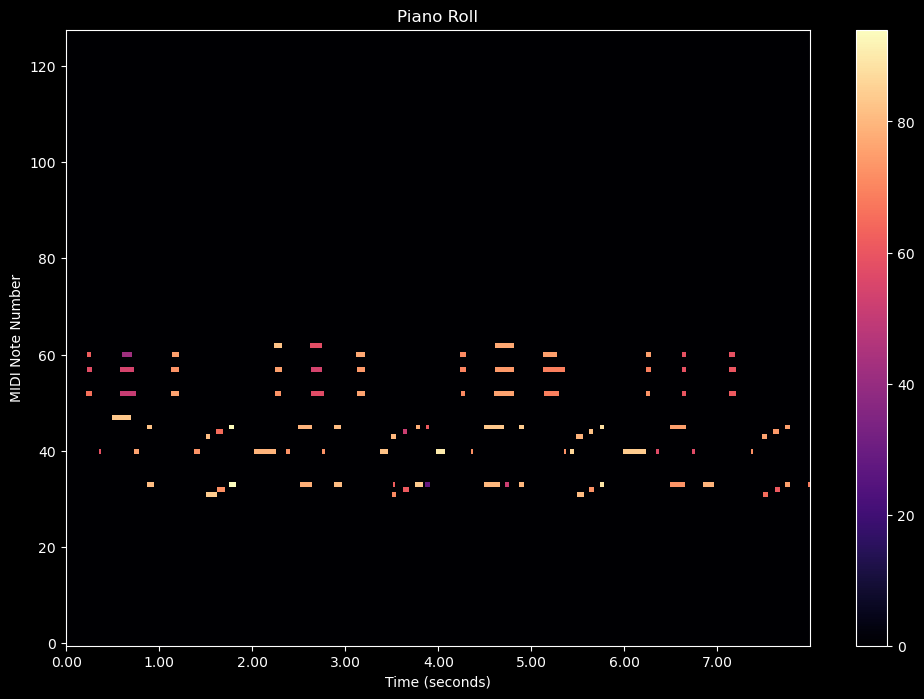

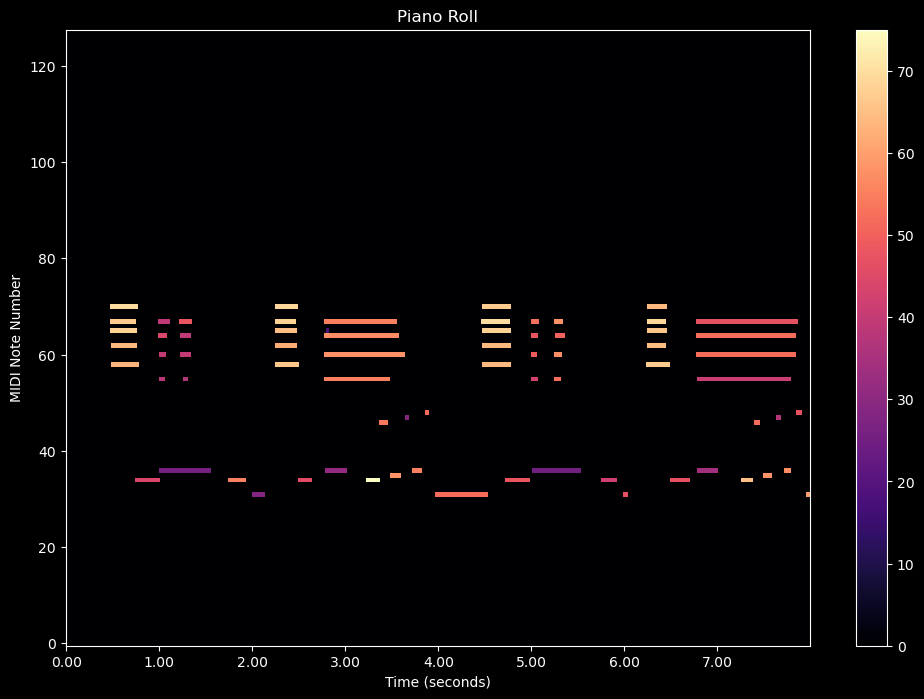

In [2]:
for file in os.listdir(output_path):
  pr = np.load(os.path.join(output_path, file), allow_pickle=True)
  mu.draw_piano_roll(pr, fs, title=f"{file} fs={fs}")